In [2]:
from unstructured.partition.pdf import partition_pdf
from unstructured.documents.elements import Element, Text, Image, FigureCaption

/Users/deepakmittal/Desktop/localrag/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


In [5]:
base_dir = "files"
pdf_file_name = "2312.10997v5.pdf"

pdf_file_path = f"{base_dir}/{pdf_file_name}"

In [13]:
raw_chunks = partition_pdf(
    filename=pdf_file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_image_block_types=["Image", "Figure", "Table"],
    extract_image_block_to_payload=True,
    chunking_strategy=None,
    )

In [26]:
raw_chunks

In [ ]:
for idx, chunk in enumerate(raw_chunks):
    if isinstance(chunk, Image):
        print(idx)

31
44
58
240
304
409


### Image Parsing - Image Captioning

In [31]:
raw_chunks[31].to_dict()

{'type': 'Image',
 'element_id': '2e91137cb5984f4736dbb10b33354d6b',
 'text': 'Fine-tuning 2023 Retrieval—Augmented Generation Pre-training Inference RADA, Retro++',
 'metadata': {'coordinates': {'points': ((np.float64(243.10555555555555),
     np.float64(155.7240000000001)),
    (np.float64(243.10555555555555), np.float64(1028.3555555555556)),
    (np.float64(1456.865), np.float64(1028.3555555555556)),
    (np.float64(1456.865), np.float64(155.7240000000001))),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-06-16T21:06:25',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 2,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANoBL4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQR

In [30]:
raw_chunks[32].to_dict()

{'type': 'FigureCaption',
 'element_id': 'bd4bc2803805b042c7b9b6085d317bc3',
 'text': 'Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.',
 'metadata': {'detection_class_prob': 0.8932827115058899,
  'coordinates': {'points': ((np.float64(133.66351318359375),
     np.float64(1060.8123377777779)),
    (np.float64(133.66351318359375), np.float64(1157.670948888889)),
    (np.float64(1573.9959716796875), np.float64(1157.670948888889)),
    (np.float64(1573.9959716796875), np.float64(1060.8123377777779))),
   'system'

In [34]:
all_images = []

for idx, chunk in enumerate(raw_chunks):
    if isinstance(chunk, Image):
        # check idx + 1 is figure caption
        if idx + 1 < len(raw_chunks) and isinstance(raw_chunks[idx + 1], FigureCaption):
            caption = raw_chunks[idx + 1].text
        else:
            caption = None

        all_images.append({
            "index": idx,
            "caption": caption if caption else "No caption",
            "image_text": chunk.text,
            "base64_image": chunk.metadata.image_base64,
        })

In [35]:
all_images[0]

{'index': 31,
 'caption': 'Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.',
 'image_text': 'Fine-tuning 2023 Retrieval—Augmented Generation Pre-training Inference RADA, Retro++',
 'base64_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANoBL4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRB

In [36]:
import base64
from IPython.display import display, Image as IPImage
def display_image(image_base64):
    image_data = base64.b64decode(image_base64)
    display(IPImage(data=image_data, format='png'))

Index: 31, Caption: Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.


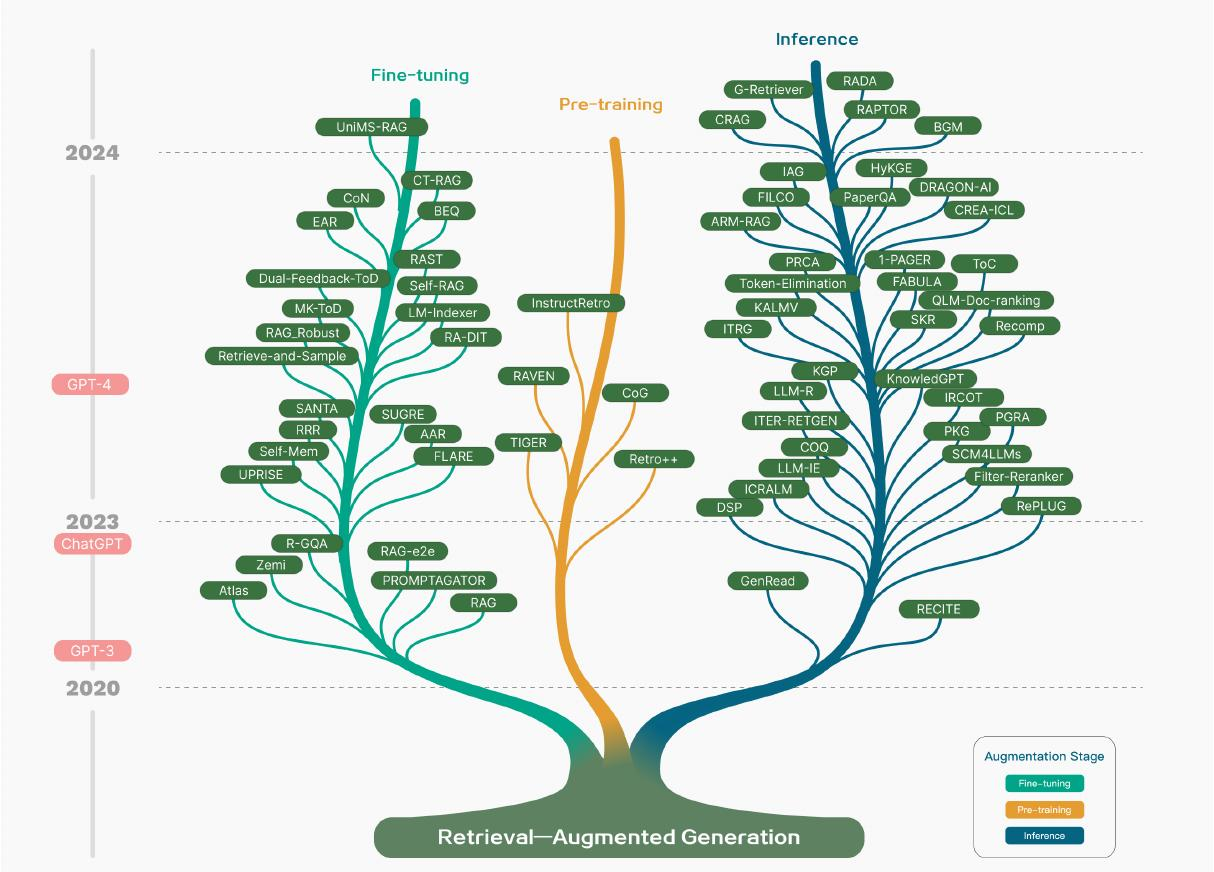

Index: 44, Caption: Fig. 2. A representative instance of the RAG process applied to question answering. It mainly consists of 3 steps. 1) Indexing. Documents are split into chunks, encoded into vectors, and stored in a vector database. 2) Retrieval. Retrieve the Top k chunks most relevant to the question based on semantic similarity. 3) Generation. Input the original question and the retrieved chunks together into LLM to generate the final answer.


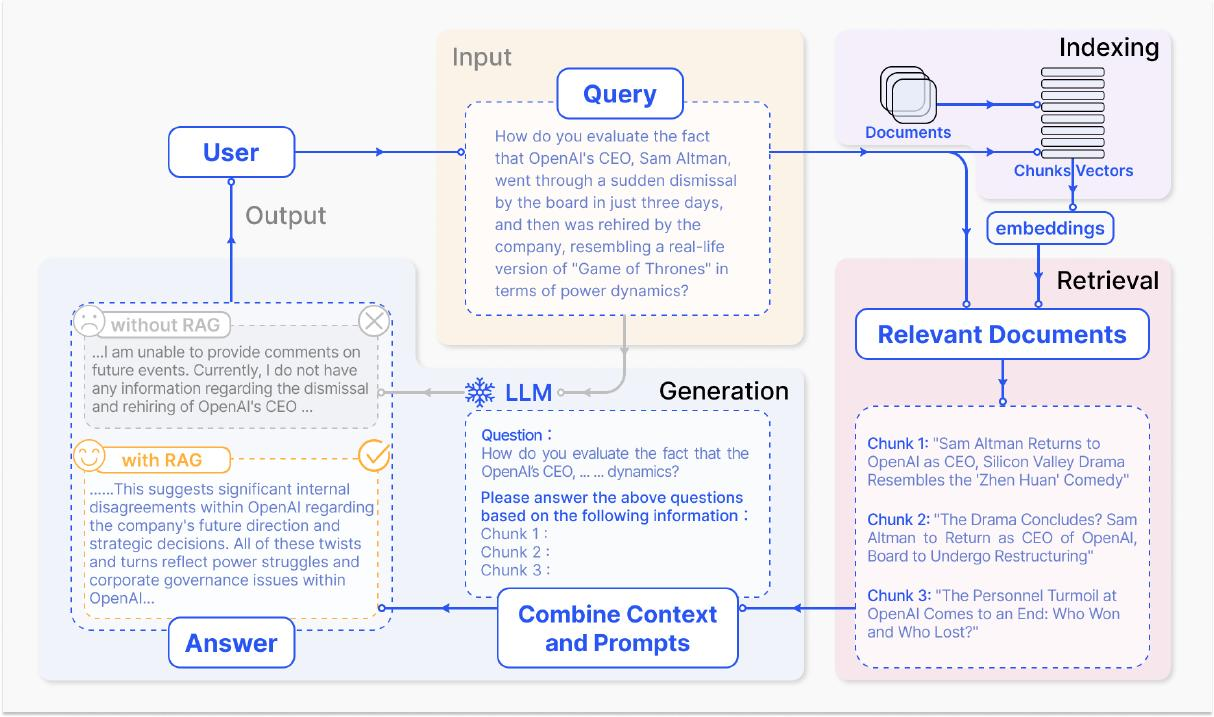

Index: 58, Caption: Fig. 3. Comparison between the three paradigms of RAG. (Left) Naive RAG mainly consists of three parts: indexing, retrieval and generation. (Middle) Advanced RAG proposes multiple optimization strategies around pre-retrieval and post-retrieval, with a process similar to the Naive RAG, still following a chain-like structure. (Right) Modular RAG inherits and develops from the previous paradigm, showcasing greater flexibility overall. This is evident in the introduction of multiple specific functional modules and the replacement of existing modules. The overall process is not limited to sequential retrieval and generation; it includes methods such as iterative and adaptive retrieval.


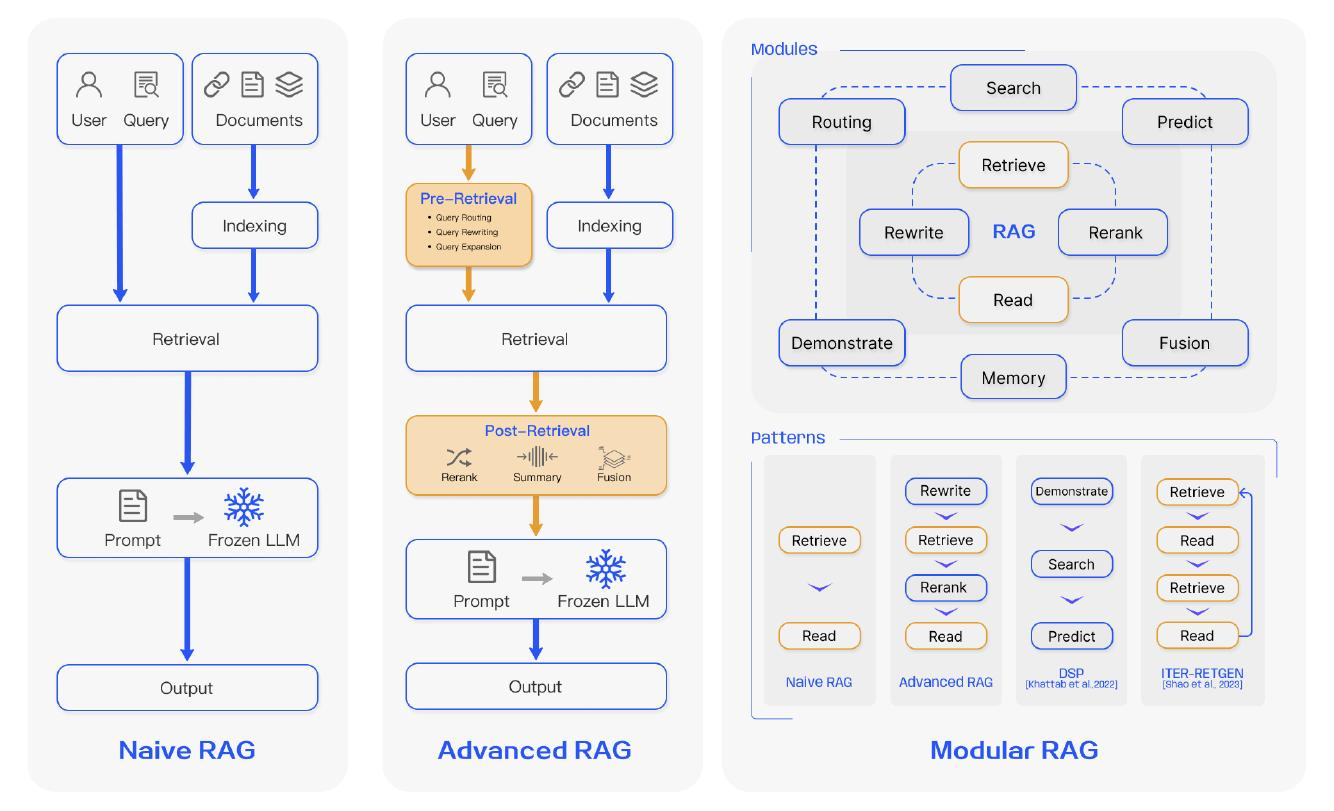

Index: 240, Caption: Fig. 4. RAG compared with other model optimization methods in the aspects of “External Knowledge Required” and “Model Adaption Required”. Prompt Engineering requires low modifications to the model and external knowledge, focusing on harnessing the capabilities of LLMs themselves. Fine-tuning, on the other hand, involves further training the model. In the early stages of RAG (Naive RAG), there is a low demand for model modifications. As research progresses, Modular RAG has become more integrated with fine-tuning techniques.


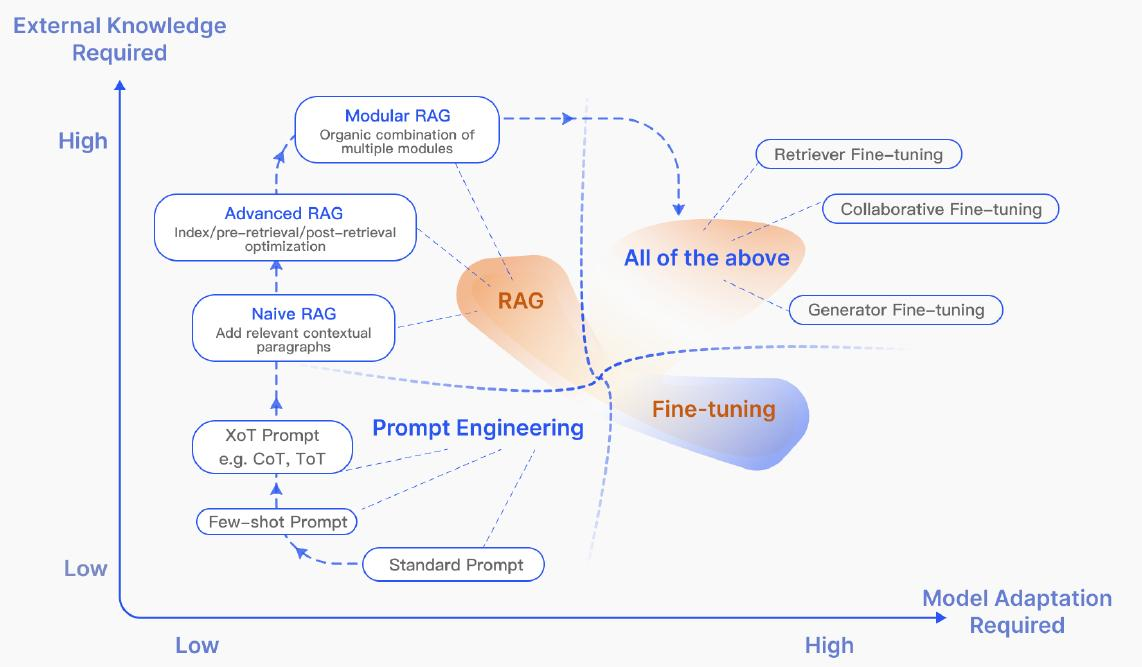

Index: 304, Caption: Fig. 5. In addition to the most common once retrieval, RAG also includes three types of retrieval augmentation processes. (left) Iterative retrieval involves alternating between retrieval and generation, allowing for richer and more targeted context from the knowledge base at each step. (Middle) Recursive retrieval involves gradually refining the user query and breaking down the problem into sub-problems, then continuously solving complex problems through retrieval and generation. (Right) Adaptive retrieval focuses on enabling the RAG system to autonomously determine whether external knowledge retrieval is necessary and when to stop retrieval and generation, often utilizing LLM-generated special tokens for control.


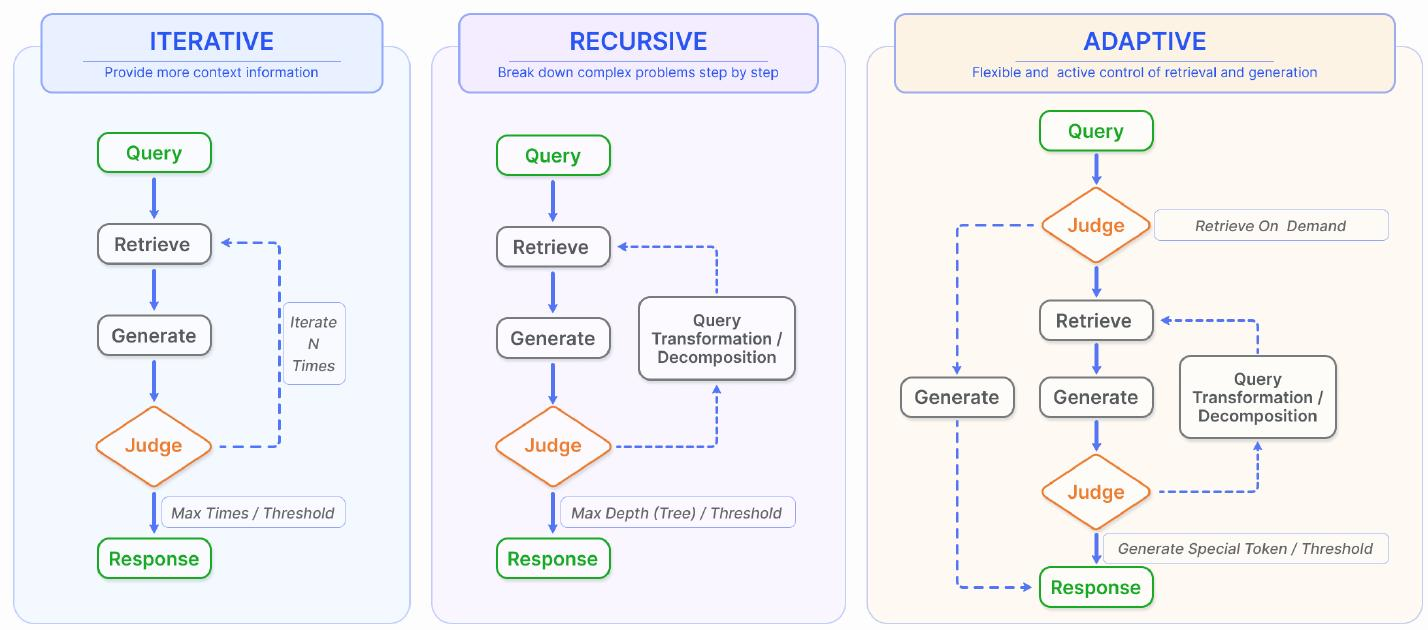

Index: 409, Caption: Fig. 6. Summary of RAG ecosystem


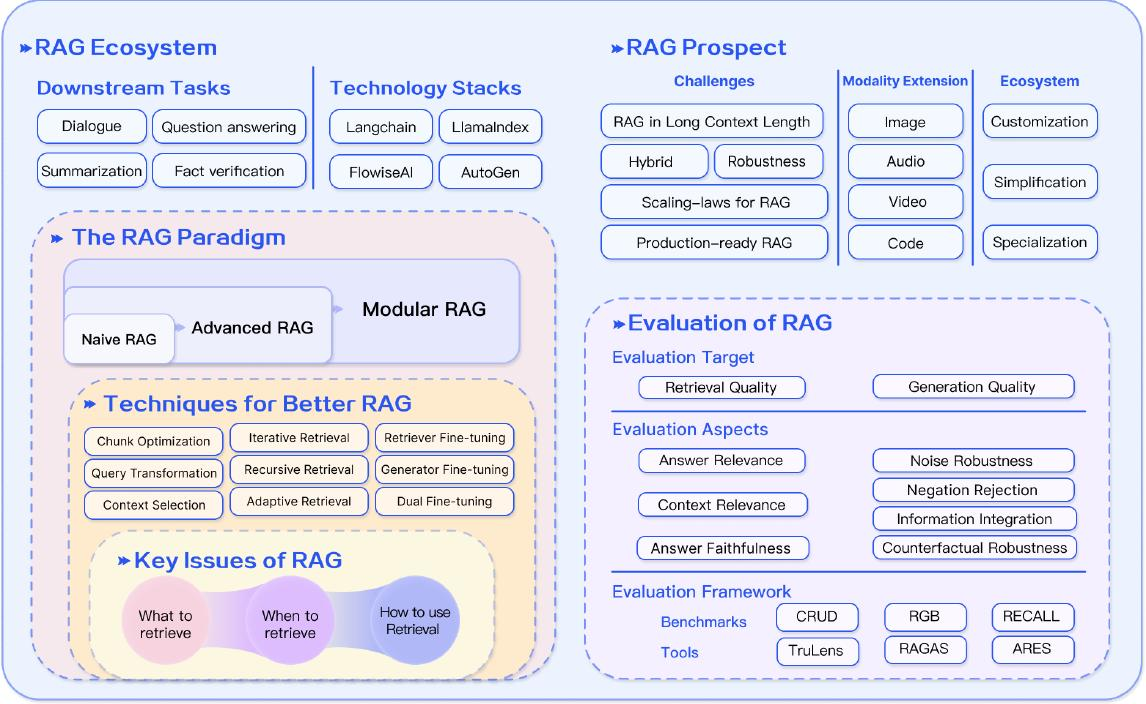

In [38]:
for image_data in all_images:
    print(f"Index: {image_data['index']}, Caption: {image_data['caption']}")
    display_image(image_data["base64_image"])

### Image Captioning

In [39]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("GEMINI_API_KEY")
if not api_key:
    raise ValueError("GEMINI_API_KEY is not set in the environment variables.")

In [47]:
import google.generativeai as genai
genai.configure(api_key=api_key)


def generate_image_description(image_data):
    model = genai.GenerativeModel("gemini-1.5-flash") 

    image_binary = base64.b64decode(image_data["base64_image"])

    prompt = (
        f"Describe the image in detail. The caption is: {image_data['caption']}."
        f"The image text is: {image_data['image_text']}" 
        f"Directly analyze the image and provide a detailed description without any additional text."
    )

    response = model.generate_content([
        prompt,
        {"mime_type": "image/png", "data": image_binary},
    ])

    return response.text

In [49]:
print(generate_image_description(all_images[0]))  # Example usage with the first image

Here's a description of the provided image:

The image is a technology tree diagram visualizing the research landscape of Retrieval-Augmented Generation (RAG).  The tree's trunk is labeled "Retrieval-Augmented Generation" and branches out into three main sections representing the stages of RAG: Pre-training, Fine-tuning, and Inference.

Each branch is further subdivided into numerous smaller branches, each representing a specific research paper or model contributing to that stage of RAG development.  The names of these papers/models are displayed on the branches. 


The branches are color-coded: 

* **Pre-training:** A golden-orange color.
* **Fine-tuning:** A teal/green color.
* **Inference:** A darker teal/blue-green color.

A timeline on the left-hand side shows the years 2020, 2023, and 2024, indicating the approximate periods when various research contributions were made. Key milestones like the release of GPT-3 and GPT-4 are also highlighted on the timeline.

A legend in the lowe

### Table Parsing

In [53]:
from unstructured.documents.elements import Table

table_data = []
for idx, element in enumerate(raw_chunks):
    if isinstance(element, Table):
        table_data.append({
            "table_as_html": element.metadata.text_as_html,
        })

In [54]:
table_data[0]  # Display the first table's HTML representation

{'table_as_html': '<table><thead><tr><th></th><th>. Retrieval Source</th><th>Retrieval Data Type</th><th>Retrieval . Granularity</th><th>Augmentation Stage</th></tr></thead><tbody><tr><td></td><td>Wikipedia</td><td>Text</td><td>Phrase</td><td>Pre-training</td></tr><tr><td></td><td>FactoidWiki</td><td>Text</td><td>Proposition</td><td>Inference</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Search Engine, Wikipedia</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Wikipedia</td><td>Text</td><td>Sentence</td><td>Inference</td></tr><tr><td></td><td>Wikipedia</td><td>Text</td><td>Sentence</td><td>Inference</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td

In [ ]:
from IPython.display import display, HTML

def display_table_as_html(table_html):
    display(HTML(table_html))

display_table_as_html(table_data[1]["table_as_html"]) 

In [56]:
table_data[1]

{'table_as_html': '<table><tbody><tr><td rowspan="4">Single-hop</td><td>Natural Qustion(NQ) [111</td></tr><tr><td>TriviaQA(TQA) [113</td></tr><tr><td>SQuAD [114] Web Questions(WebQ) {115}</td></tr><tr><td>PopQa [116] MS MARCO 117}</td></tr><tr><td rowspan="2">Multi-hop</td><td>HotpotQA ni</td></tr><tr><td>2WikiMultiHopQa [119]</td></tr><tr><td>Long-form QA</td><td>MuSiQue ELI5 NarrativeQ A(NQA) [122 (122) ASQA [124] prea</td></tr><tr><td>Domain QA</td><td>) [125] (125) Qasper [126| [126] 26 COVID-QA | at (129) (128),.M</td></tr><tr><td></td><td>ARC ret ae CommonsenseQA 132)</td></tr><tr><td>Graph QA</td><td>GraphQA (84)</td></tr><tr><td>Dialog Generation Personal Dialog</td><td>Wizard of Wikipedia (WoW) (133 Kpp (134</td></tr><tr><td>Task-oriented Dialog</td><td>DuleMon [136] CamRest (137</td></tr><tr><td>Recommendation Event Argument Extraction</td><td>Amazon(Toys,Sport,Beauty) [138| WikiEvent</td></tr><tr><td>Relation Extraction</td><td></td></tr><tr><td>Commonsense Reasoning CoT Rea

In [59]:
# Genereate table description using Gemini
def generate_table_description(table_html):
    model = genai.GenerativeModel("gemini-1.5-flash") 

    prompt = (
        "Analyze the following table and provide a detailed description of its contents, "
        "including the structure, key data points, and any notable trends or insights."
        f"Here is the table in HTML format: {table_html}"
        "Directly analyze the table and provide a detailed description without any additional text."
    )

    response = model.generate_content([prompt])
    return response.text


In [61]:
print(generate_table_description(table_data[1]["table_as_html"]))  # Example usage with the second table

The table categorizes various question answering and language understanding datasets.  It's structured hierarchically, grouping datasets by task type:

* **Single-hop QA:** Datasets requiring retrieval of information from a single source (NQ, TQA, SQuAD, WebQ, PopQA, MS MARCO).

* **Multi-hop QA:** Datasets requiring information retrieval from multiple sources (HotpotQA, 2WikiMultiHopQA).

* **Long-form QA:** Datasets focused on longer, more complex answers (MuSiQue, ELI5, NarrativeQA, ASQA).

* **Domain QA:** Datasets specific to particular domains (COVID-QA, Qasper, ARC, CommonsenseQA).

* **Graph QA:** Datasets requiring graph traversal for question answering (GraphQA).

* **Dialog Generation:**  Subdivided into Personal Dialog (Wizard of Wikipedia, Kp) and Task-oriented Dialog (DuleMon, CamRest).

* **Recommendation, Event Argument Extraction, Relation Extraction, Commonsense Reasoning, CoT Reasoning, Complex Reasoning, Language Understanding, Language Modeling, Fact Checking/Verif

In [68]:
# generate table summary using Ollama
import requests
def generate_table_summary(table_html):
    url = "http://localhost:11434/api/generate"
    data = {
        "model": "deepseek-r1:1.5b",
        "prompt": (
            "Analyze the following table and provide a detailed summary of its contents, "
            "including the structure, key data points, and any notable trends or insights."
            f"Here is the table in HTML format: {table_html}"
            "Directly analyze the table and provide a detailed summary without any additional text."
        ),
        "max_tokens": 1000,
        "stream": False,
        "temperature": 0.7,
    }

    response = requests.post(url, json=data)
    response.raise_for_status()
    return response.json().get("response", "No response from model")

In [70]:
print(generate_table_summary(table_data[1]["table_as_html"]))  # Example usage with the second table

<think>
Alright, I'm looking at this user query where they want me to analyze an HTML table provided in JSON format. The table seems to be about different question answering systems or models. My task is to parse the table, extract key data points, structure it, and provide a detailed summary without any additional text.

First, I need to understand the structure of the HTML table. It's wrapped in <table> tags with rows and cells. Each row starts with <tr> and has multiple <td> elements or non-td elements like <strong>, <em>, etc., which indicate headings. The headers are "Single-hop" and "Multi-hop", each containing subheaders.

I should identify the header section: two main sections under single-hop and multi-hop. Each of these has several question types listed with their respective formats and maybe more details in parentheses.

For example, Single-hop includes NQ, TriviaQA, SQuAD, PopQa, and MS MARCO. The first two have numbers indicating the format or version (like 111 for NQ). Tr

### Text Parsing

In [71]:
text_chunks = partition_pdf(
    filename=pdf_file_path,
    strategy="hi_res",
    chunking_strategy="by_title",
    max_characters=2000,
    combine_text_under_n_chars=500,
    new_after_n_chars=1500
)

In [72]:
text_chunks

In [73]:
from unstructured.documents.elements import CompositeElement

for idx, chunk in enumerate(text_chunks):
    if isinstance(chunk, CompositeElement):
        print(f"Chunk {idx}: {chunk.text[:50]}...")  # Print first 50 characters of each chunk

Chunk 0: 4

2024

2

0

2 r a M 7 2 ] L C . s c [ 5 v 7 9 9...
Chunk 1: Index Terms—Large language model, retrieval-augmen...
Chunk 2: The burgeoning field of RAG has experienced swift ...
Chunk 3: Corresponding Author.Email:haofen.wang@tongji.edu....
Chunk 4: II. OVERVIEW OF RAG

A typical application of RAG ...
Chunk 5: A. Naive RAG

The Naive RAG research paradigm repr...
Chunk 6: widespread adoption of ChatGPT. The Naive RAG foll...
Chunk 7: However, Naive RAG encounters notable drawbacks:

...
Chunk 8: B. Advanced RAG

Advanced RAG introduces specific ...
Chunk 9: Pre-retrieval process. In this stage, the primary ...
Chunk 10: The modular RAG architecture advances beyond the f...
Chunk 11: aligns the text more closely with data distributio...
Chunk 12: Innovations such as the Rewrite-Retrieve-Read [7]m...
Chunk 13: D. RAG vs Fine-tuning

The augmentation of LLMs ha...
Chunk 14: In multiple evaluations of their performance on va...
Chunk 15: III. RETRIEVAL

In the context of RAG, i